## 1장 - 네트워크 구성요소

In [2]:
import networkx as nx

G = nx.Graph()
G.add_node(1)
G.add_node(2)
G.add_edge(1,2)

# 한 번에 몇 개의 노드와 링크 삽입

G.add_nodes_from([3,4,5,...])
G.add_nodes_from([(3,4),(3,5),...])

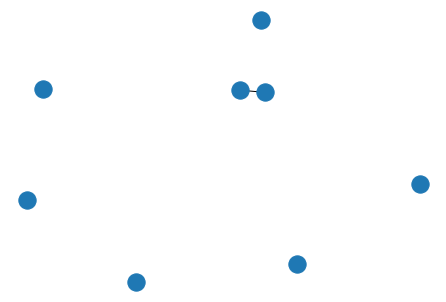

In [4]:
G.nodes() # 노드 리스트
G.edges() # 링크 리스트
G.neighbors(3) # 한 노드의 이웃 노드의 리스트 
nx.draw(G)

In [7]:
# 노드와 링크를 모두 돌아보는 방법

for n in G.nodes :
    print(n, G.neighbors(n))
for u,v in G.edges:
    print(u,v)

1 <dict_keyiterator object at 0x000001C5CC00D4A0>
2 <dict_keyiterator object at 0x000001C5CC00D4A0>
3 <dict_keyiterator object at 0x000001C5CC00D4A0>
4 <dict_keyiterator object at 0x000001C5CC00D4A0>
5 <dict_keyiterator object at 0x000001C5CC00D4A0>
Ellipsis <dict_keyiterator object at 0x000001C5CC00D4A0>
(3, 4) <dict_keyiterator object at 0x000001C5CC00D4A0>
(3, 5) <dict_keyiterator object at 0x000001C5CC00D4A0>
1 2


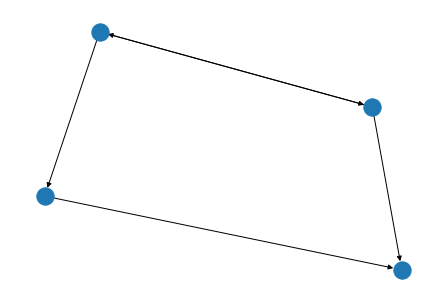

In [18]:
D = nx.DiGraph() # 방향성 네트워크
D.add_edge(1,2)
D.add_edge(2,1)
D.add_edges_from([(2,3),(3,4),(1,4)])

nx.draw(D)

In [17]:
D.number_of_edges() # 링크 수

5

In [18]:
D.number_of_nodes() # 네트워크의 크기

4

In [20]:
D.neighbors(2) # 해당 노드에 연결된 이웃 모두를 확인

In [21]:
D.predecessors(2) # 해당 노드를 향해 연결된 에지

In [22]:
D.successors(2) # 해당 노드로 부터 나가는 에지

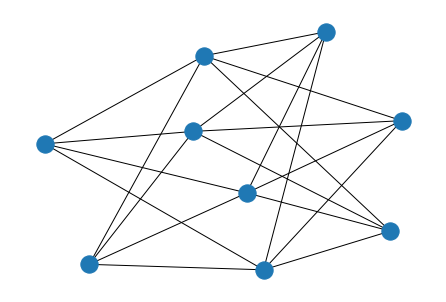

In [24]:
b = nx.complete_bipartite_graph(4,5) # 완전 이분 네트워크
nx.draw(b)

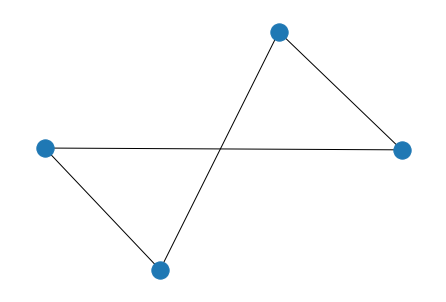

In [25]:
c = nx.cycle_graph(4) # 순환 경로
nx.draw(c)

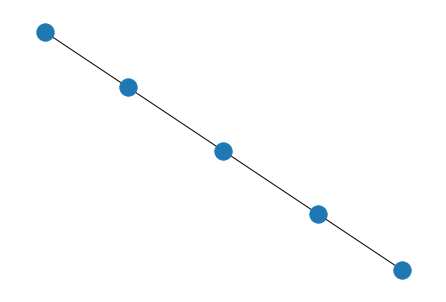

In [26]:
p = nx.path_graph(5) # 경로 네트워크
nx.draw(p)

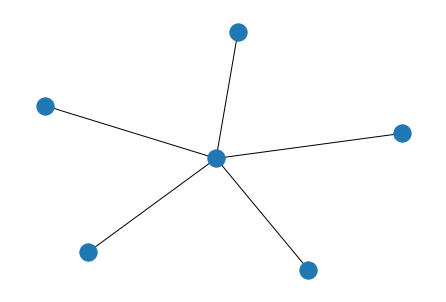

In [28]:
s = nx.star_graph(5) # 스타 네트워크
nx.draw(s)

### 조밀도와 성김도

- 완전 네트워크 : 가능한 모든 노드 쌍이 링크로 연결된 최대 링크 수를 갖는 네트워크
- 조밀도(density) : 실제로 존재할 수 있는 링크의 비율 / 실제로 연결된 노드 쌍의 비율
- 대부분의 노드 쌍이 서로 직접 연결되지 않기 때문에 실제 링크 수는 일반적으로 최댓값보다 훨씬 작음
- 성김도(sparsity) : 대부분의 실제 대규모 네트워크에서 조밀도는 1보다 10분의 1, 100분의 1로 훨씬 더 작은데, 이러한 성질을 성김도라고 함
- 네트워크에 연결선이 적을수록 더 성김

In [29]:
nx.density(G)

0.03571428571428571

In [30]:
nx.density(D)

0.4166666666666667

In [31]:
CG = nx.complete_graph(8420) # 큰 완전 네트워크
print(nx.density(CG))

1.0


### 서브네트워크

- 서브네트워크 : 네트워크의 부분집합, 부분 그래프라고도 함
- 클리크 : 노드의 부분집합이 모두 서로 연결된 완전 서브네트워크
- 완전 네트워크의 모든 노드 쌍은 연결되어 있으므로, 완전 네트워크의 모든 서브 네트워크는 클리크
- 자기주변 네트워크(ego network) : 에고라 불리는 선택된 노드와 그 아웃으로 구성된 서브네트워크

In [35]:
k5 = nx.complete_graph(5)
clique = nx.subgraph(k5, (0,1,2))

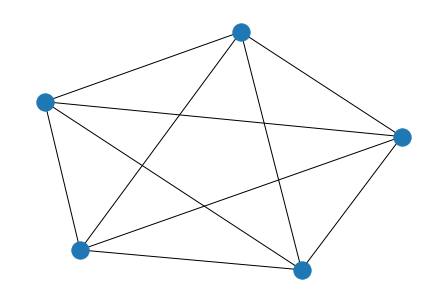

In [36]:
nx.draw(k5)

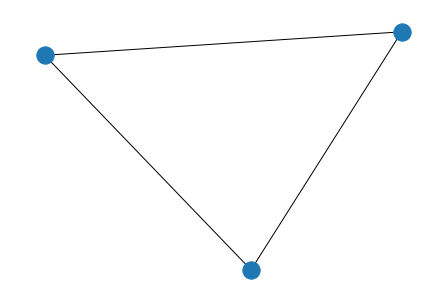

In [37]:
nx.draw(clique)

### 연결선 수

In [38]:
G.degree(2) # 노드 2의 연결선 수

1

In [39]:
G.degree() # 네트워크 G의 모든 노드의 연결선 수

DegreeView({1: 1, 2: 1, 3: 0, 4: 0, 5: 0, Ellipsis: 0, (3, 4): 0, (3, 5): 0})

### 방향성 네트워크

In [40]:
D.in_degree(4) # 노드 4의 들어오는 연결선 수

2

In [41]:
D.out_degree(4) # 노드 4의 나가는 연결선 수

0

In [42]:
D.degree(4) # 노드 4의 연결선 수

2

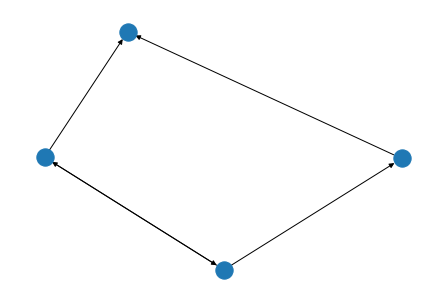

In [43]:
nx.draw(D)

### 가중치 네트워크

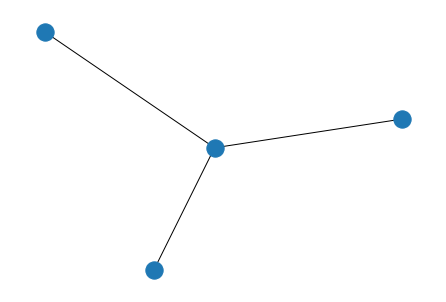

In [22]:
# 그래프와 방향성 그래프 모두 링크에 '가중치' 속성 부여 가능

W = nx.Graph()
W.add_edge(1,2,weight = 6) 
W.add_weighted_edges_from([(2,3,3,),(2,4,5)]) # 세 번째 요소가 가중치
nx.draw(W)

In [46]:
# 큰 가중치를 갖는 링크 출력

for (i,j,w) in W.edges(data = 'weight'):
    if w>3 :
        print('(%d, %d, %d)' % (i,j,w))

(1, 2, 6)
(2, 4, 5)


In [47]:
W.degree(2, weight = 'weight') # 주어진 노드의 연결강도 확인

14

### 네트워크 표현법

In [26]:
import warnings
warnings.filterwarnings('ignore')

print(nx.adjacency_matrix(G)) # 그래프 인접 행렬

  (0, 1)	1
  (1, 0)	1


In [27]:
print(nx.adjacency_matrix(D)) # 방향성 그래프 인접 행렬

  (0, 1)	1
  (0, 3)	1
  (1, 0)	1
  (1, 2)	1
  (2, 3)	1


In [28]:
print(nx.adjacency_matrix(W)) # 가중치 그래프 인접 행렬

  (0, 1)	6
  (1, 0)	6
  (1, 2)	3
  (1, 3)	5
  (2, 1)	3
  (3, 1)	5


In [29]:
# 각 노드의 이웃을 출력하는 방법

for n, neighbors in G.adjacency():
    for number, link_attributes in neighbors.items():
        print('(%d, %d)'% (n,number))

(1, 2)
(2, 1)


In [30]:
# 에지 리스트 표현법

nx.write_edgelist(G, "file.edges")
G2 = nx.read_edgelist("file.edges") # G2는 G와 같다.
nx.write_weighted_edgelist(W, "wf.edges") # 가중치 기록
with open("wf.edges") as f:
    for line in f:
        print(line)
        
W2 = nx.read_weighted_edgelist("wf.edges") # W2는 W와 같다.

1 2 6

2 3 3

2 4 5

